In [101]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [102]:
from simpsons_paradox.simpsons_paradox import SimpsonsParadox

In [103]:
df = pd.read_csv(data_path / "diabetic_prepared.csv")

### Age group / readmission relationship

Age group | Average readmission rate | Logistic function value
----------|-------------------------|-------------------------
[0-10) | 0.02 | 0.5047
[10-20) | 0.06 | 0.5145
[20-30) | 0.14 | 0.5355
[30-40) | 0.11 | 0.5280
[40-50) | 0.11 | 0.5265
[50-60) | 0.10 | 0.5241
[60-70) | 0.11 | 0.5278
[70-80) | 0.12 | 0.5294
[80-90) | 0.12 | 0.5302
[90-100) | 0.11 | 0.5277


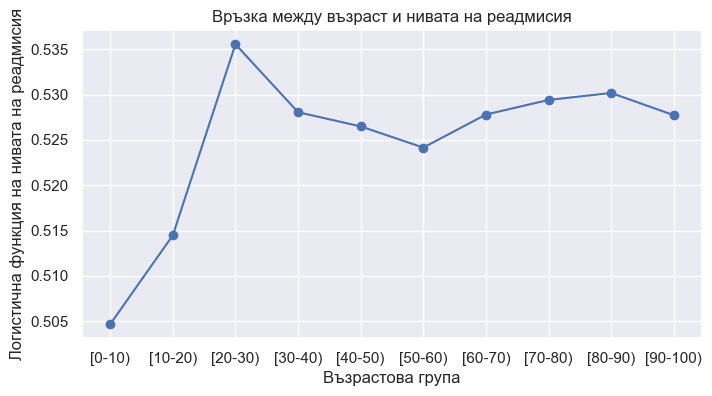

In [104]:
# Group the data by age
grouped_by_age = df.groupby('age')

# Calculate the average readmission rate for each age group
average_readmission_rates = grouped_by_age['readmit_30_days'].mean()

# Calculate the logistic function of the average readmission rate for each age group
logistic_function_values = 1 / (1 + np.exp(-average_readmission_rates))

# Print the results
print('Age group | Average readmission rate | Logistic function value')
print('----------|-------------------------|-------------------------')
for age_group, average_readmission_rate, logistic_function_value in \
zip(grouped_by_age.groups.keys(), average_readmission_rates, logistic_function_values):
  print(f'{age_group} | {average_readmission_rate:.2f} | {logistic_function_value:.4f}')

plt.figure(figsize=(8,4))

# Create a scatter plot showing the relationship between age and the logistic function of the readmission rate
plt.plot(grouped_by_age.groups.keys(), logistic_function_values, '-o')

# Set the axis labels
plt.xlabel('Възрастова група')
plt.ylabel('Логистична функция на нивата на реадмисия')

# Set the title of the plot
plt.title('Връзка между възраст и нивата на реадмисия')

# Show the plot
plt.show()

### Divide data into 3 categories by age

In [105]:
df["age_all"] = df["age"]
df.loc[:, "age"] = df["age"].replace(["[0-10)", "[10-20)", "[20-30)"], "30 years or younger")
df.loc[:, "age"] = df["age"].replace(["[30-40)", "[40-50)", "[50-60)"], "30-60 years")
df.loc[:, "age"] = df["age"].replace(["[60-70)", "[70-80)", "[80-90)", "[90-100)"], "Over 60 years")

<Axes: >

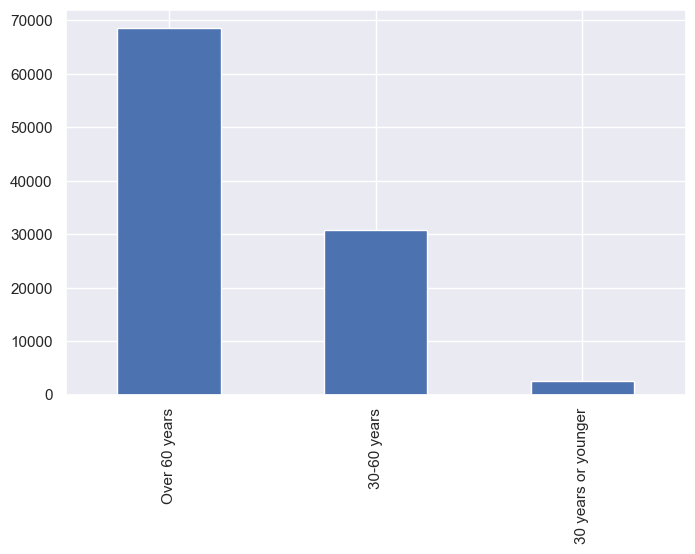

In [106]:
df["age"].value_counts().plot(kind='bar')

#### Analysis of attributes related to the benefit of additional care

<Axes: xlabel='readmit_30_days', ylabel='had_outpatient_days'>

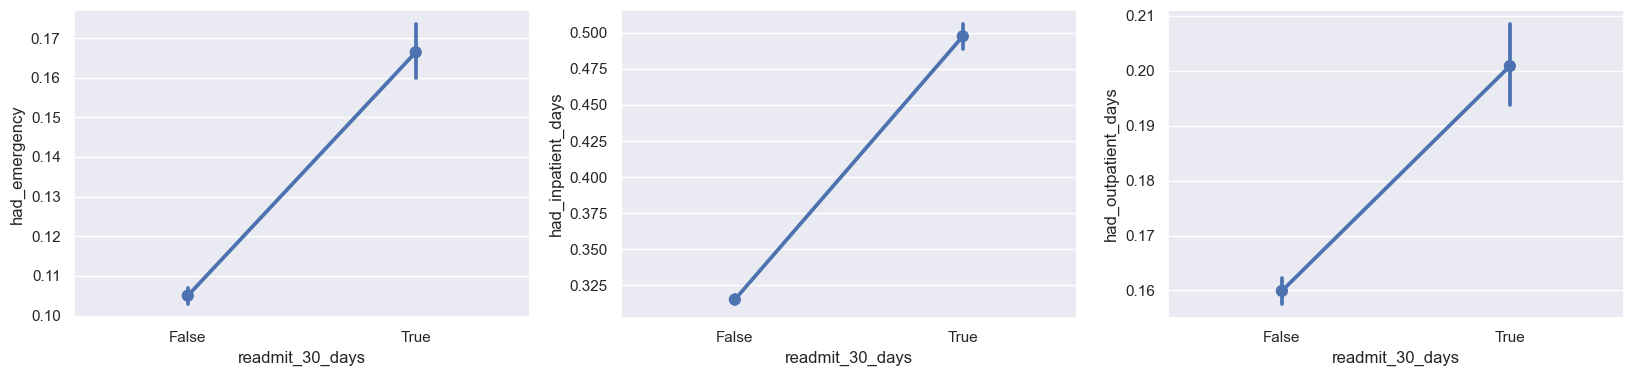

In [107]:
sns.set()
_, axes = plt.subplots(1, 3, figsize=(20, 4))

sns.pointplot(ax=axes[0], data=df, x="readmit_30_days", y="had_emergency")
sns.pointplot(ax=axes[1], data=df, x="readmit_30_days", y="had_inpatient_days")
sns.pointplot(ax=axes[2], data=df, x="readmit_30_days", y="had_outpatient_days")

#### Analysis by gender, race, age

<Axes: xlabel='readmit_30_days', ylabel='had_outpatient_days'>

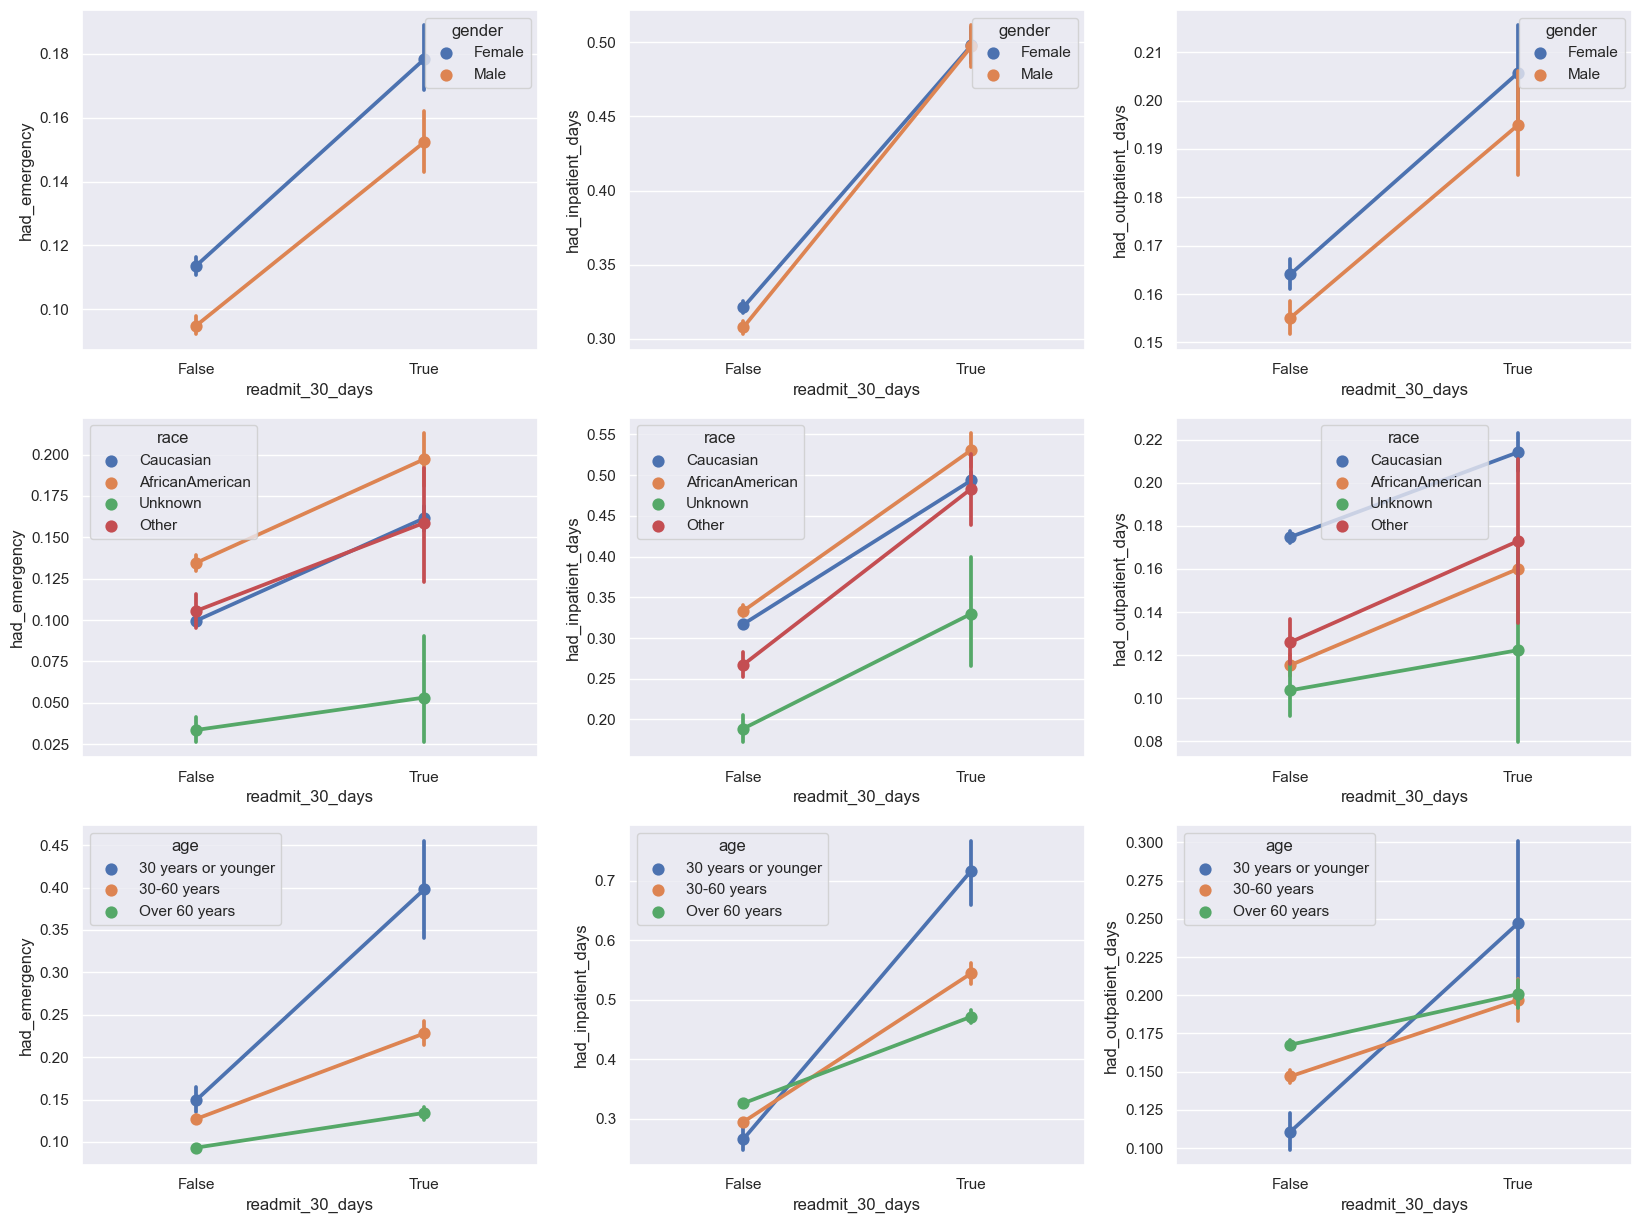

In [108]:
sns.set()
_, axes = plt.subplots(3, 3, figsize=(20, 15))

#gender
sns.pointplot(ax=axes[0, 0], data=df, x="readmit_30_days", y="had_emergency", hue='gender')
sns.pointplot(ax=axes[0, 1], data=df, x="readmit_30_days", y="had_inpatient_days", hue='gender')
sns.pointplot(ax=axes[0, 2], data=df, x="readmit_30_days", y="had_outpatient_days", hue='gender')

#race
sns.pointplot(ax=axes[1, 0], data=df, x="readmit_30_days", y="had_emergency", hue='race')
sns.pointplot(ax=axes[1, 1], data=df, x="readmit_30_days", y="had_inpatient_days", hue='race')
sns.pointplot(ax=axes[1, 2], data=df, x="readmit_30_days", y="had_outpatient_days", hue='race')

#age
sns.pointplot(ax=axes[2, 0], data=df, x="readmit_30_days", y="had_emergency", hue='age')
sns.pointplot(ax=axes[2, 1], data=df, x="readmit_30_days", y="had_inpatient_days", hue='age')
sns.pointplot(ax=axes[2, 2], data=df, x="readmit_30_days", y="had_outpatient_days", hue='age')

<Axes: xlabel='readmit_30_days', ylabel='time_in_hospital'>

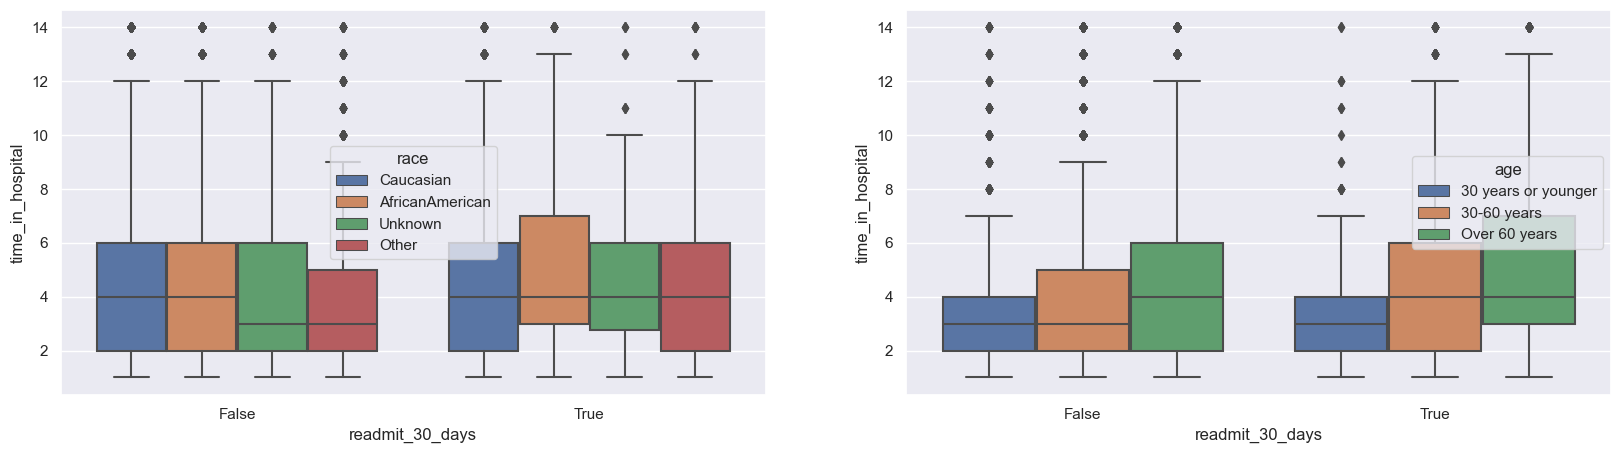

In [109]:
_, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(ax=axes[0], data=df, x="readmit_30_days", y="time_in_hospital", hue="race")
sns.boxplot(ax=axes[1], data=df, x="readmit_30_days", y="time_in_hospital", hue="age")

### Automatic detection of Simpson's paradox

In [110]:
# sp_5 = SimpsonsParadox(df=df, dv='time_in_hospital', ignore_columns=['encounter_id', 'patient_nbr', 'readmit_binary'], target_category=1)
# sp_5.get_simpsons_pairs()

# 19 Simpson’s Pair(s) were detected in your dataset.
# [('admission_type_id', 'admission_source_id'),
#  ('admission_type_id', 'num_lab_procedures'),
#  ('admission_source_id', 'admission_type_id'),
#  ('admission_source_id', 'num_lab_procedures'),
#  ('num_procedures', 'num_medications'),
#  ('number_outpatient', 'discharge_disposition_id'),
#  ('number_outpatient', 'num_medications'),
#  ('number_outpatient', 'number_diagnoses'),
#  ('diag_1', 'num_lab_procedures'),
#  ('A1Cresult', 'num_lab_procedures'),
#  ('metformin', 'change'),
#  ('metformin', 'diabetesMed'),
#  ('glimepiride', 'num_medications'),
#  ('rosiglitazone', 'num_medications'),
#  ('had_emergency', 'number_inpatient'),
#  ('had_emergency', 'number_diagnoses'),
#  ('had_emergency', 'insulin'),
#  ('had_emergency', 'had_inpatient_days'),
#  ('race_all', 'race')]

Age <-> Diabetes Type

In [111]:
df["age_numeric"] = df.apply(lambda row: int(row["age_all"].split('-')[0][1:]), axis=1)

<Axes: xlabel='diabetes_type', ylabel='age_numeric'>

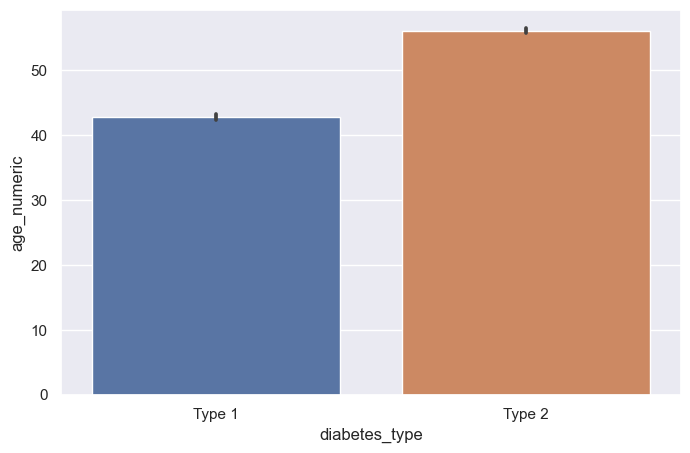

In [112]:
sns.barplot(data=df, x="diabetes_type", y="age_numeric")

[Text(0.5, 0, 'Възрастова група'), Text(0, 0.5, 'Брой пациенти')]

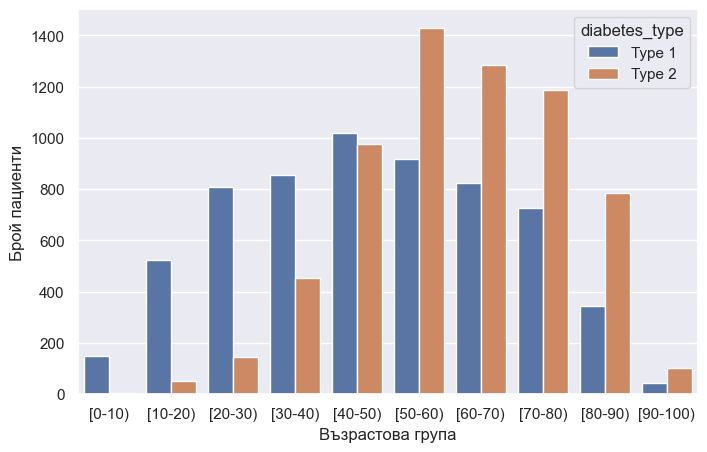

In [115]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.countplot(data=df, x="age_all", hue="diabetes_type")
ax.set(xlabel='Възрастова група', ylabel='Брой пациенти')